2025-10-27 21:15:44.755775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 3s 0us/step


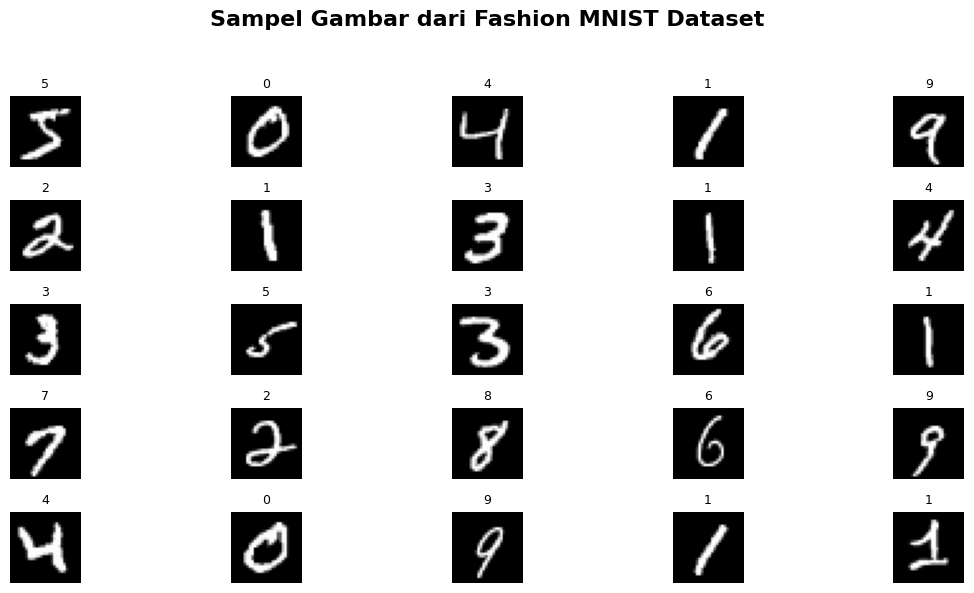


INFORMASI DATASET FASHION MNIST

Jumlah data train : 60000
Jumlah data test  : 10000
Bentuk data train : (60000, 28, 28)
Bentuk data test  : (10000, 28, 28)

Rentang nilai pixel: 0 - 255
Tipe data: uint8

DISTRIBUSI KELAS

Kelas 0: 5923 samples (9.87%)
Kelas 1: 6742 samples (11.24%)
Kelas 2: 5958 samples (9.93%)
Kelas 3: 6131 samples (10.22%)
Kelas 4: 5842 samples (9.74%)
Kelas 5: 5421 samples (9.04%)
Kelas 6: 5918 samples (9.86%)
Kelas 7: 6265 samples (10.44%)
Kelas 8: 5851 samples (9.75%)
Kelas 9: 5949 samples (9.92%)


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # dataset fashion mnist
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Kelas label untuk Fashion MNIST
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Menampilkan beberapa gambar dari dataset
plt.figure(figsize=(12, 6))
plt.suptitle('Sampel Gambar dari Fashion MNIST Dataset', fontsize=16, fontweight='bold')

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=9)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Informasi dataset
print("\nINFORMASI DATASET FASHION MNIST\n")
print(f"Jumlah data train : {X_train.shape[0]}")
print(f"Jumlah data test  : {X_test.shape[0]}")
print(f"Bentuk data train : {X_train.shape}")
print(f"Bentuk data test  : {X_test.shape}")
print(f"\nRentang nilai pixel: {X_train.min()} - {X_train.max()}")
print(f"Tipe data: {X_train.dtype}")

# Distribusi kelas
print("\nDISTRIBUSI KELAS\n")
classes, counts = np.unique(y_train, return_counts=True)
for i in range(len(classes)):
    print(f"Kelas {class_names[classes[i]]}: {counts[i]} samples ({counts[i]/len(y_train)*100:.2f}%)")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 6272)              0

2025-10-27 21:16:09.799044: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 27s 14ms/step - loss: 0.1123 - accuracy: 0.9653 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 2/9
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 3/9
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0284 - val_accuracy: 0.9901
Epoch 4/9
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0409 - val_accuracy: 0.9862
Epoch 5/9
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0422 - val_accuracy: 0.9889
Epoch 6/9
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0336 - val_accuracy: 0.9899
Epoch 7/9
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0265 - val_accuracy: 0.

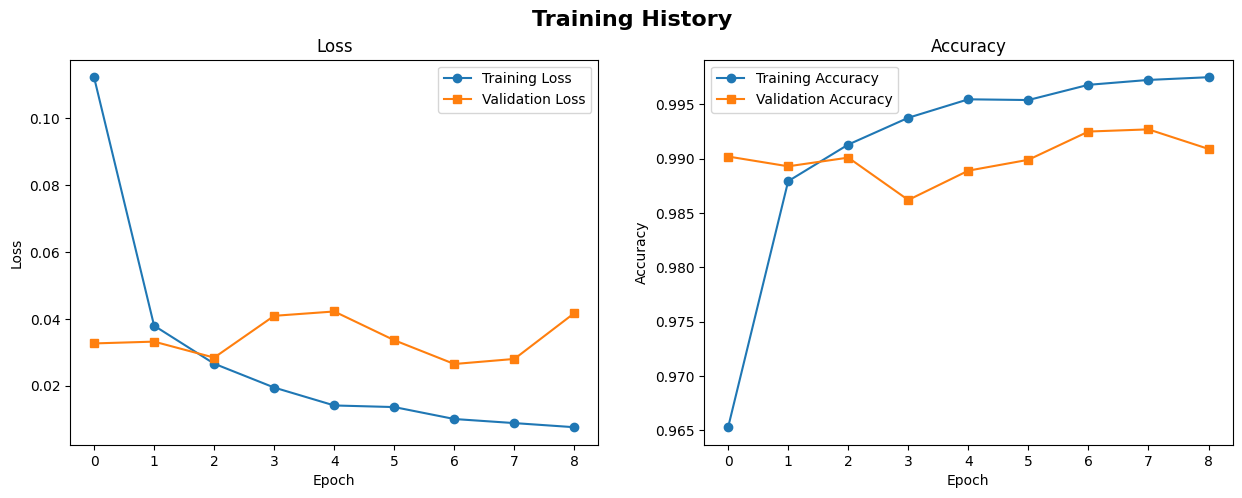

313/313 [==============================] - 1s 4ms/step


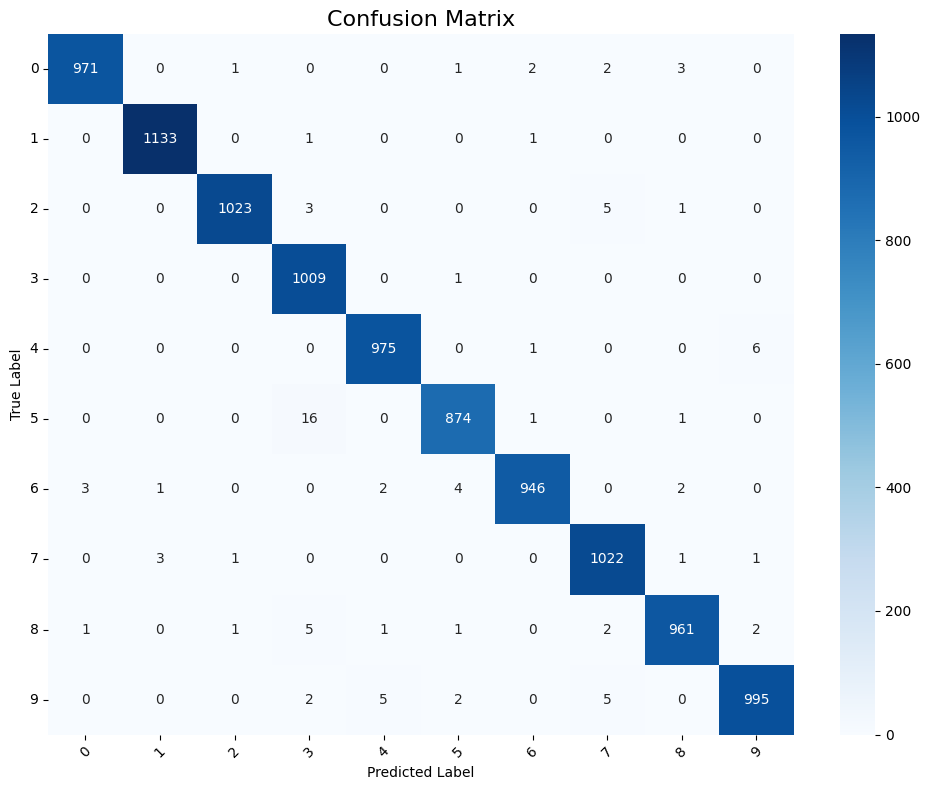

In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

# normalisasi
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# reshaping
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# create architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS = 9
BATCH_SIZE = 32

# training
history = model.fit(
    X_train, y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test_encoded),
    verbose=1
)

# visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Training History', fontsize=16, fontweight='bold')

axes[0].plot(history.history['loss'], label='Training Loss', marker='o')
axes[0].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()

# confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [3]:
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Akurasi pada data test: {accuracy:.4f}")

Akurasi pada data test: 0.9909


In [4]:
MODEL_DIR = './mnist_model_modul_5'
os.makedirs(MODEL_DIR, exist_ok=True)

model_save_path = os.path.join(MODEL_DIR, 'mnist_cnn_model.h5')
model.save(model_save_path)
print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: ./mnist_model_modul_5/mnist_cnn_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
!pip install opencv-python


[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
!apt-get update
!apt-get install -y libgl1 libglib2.0-0

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease               
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease        
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1 is already the newest version (1.4.0-1).
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.6).
0 upgraded, 0 newly installed, 0 to remove and 132 not upgraded.


In [10]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model


MODEL_DIR = './mnist_model_modul_5'
os.makedirs(MODEL_DIR, exist_ok=True)

model_save_path = os.path.join(MODEL_DIR, 'mnist_cnn_model.h5')

loaded_model = load_model(model_save_path)
print(f"Model loaded successfully from Drive! {model_save_path}")

# Daftar nama kelas Fashion MNIST
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Model loaded successfully from Drive! ./mnist_model_modul_5/mnist_cnn_model.h5


Original shape: (360, 360)

Resized shape: (28, 28)

Inverted shape: (28, 28)

Normalized shape: (28, 28)

Input shape untuk model: (1, 28, 28, 1)
1/1 [==============================] - 0s 41ms/step
[[7.3875830e-04 1.7833312e-04 1.0002032e-01 1.9666672e-02 1.9891080e-02
  1.2478073e-03 5.8955898e-06 7.0927120e-03 3.9749332e-02 8.1140912e-01]]
9

Hasil prediksi model: 9 dengan confidence 0.81



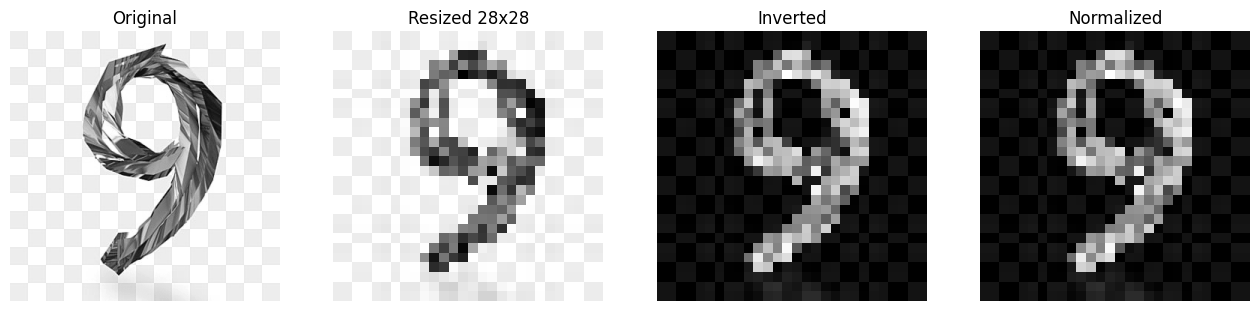

In [11]:
image="9.png"
img_path = f"./data_predict/{image}"

# Baca gambar grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print("Original shape:", img.shape)

# Resize ke 28x28
img_resized = cv2.resize(img, (28, 28))
print("\nResized shape:", img_resized.shape)

# Invers warna
img_inverted = 255 - img_resized
print("\nInverted shape:", img_inverted.shape)

# Normalisasi (0-1)
img_normalized = img_inverted.astype('float32') / 255.0
print("\nNormalized shape:", img_normalized.shape)

# Siapkan input model
img_input = np.expand_dims(img_normalized, axis=(0, -1))
print("\nInput shape untuk model:", img_input.shape)

# Prediksi
pred = loaded_model.predict(img_input)
predicted_class = np.argmax(pred)
confidence = pred[0][predicted_class]

print(pred)
print(predicted_class)


predicted_label = class_names[predicted_class]

print(f"\nHasil prediksi model: {predicted_label} dengan confidence {confidence:.2f}\n")

# Visualisasi
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(img_resized, cmap='gray')
axes[1].set_title('Resized 28x28')
axes[1].axis('off')

axes[2].imshow(img_inverted, cmap='gray')
axes[2].set_title('Inverted')
axes[2].axis('off')

axes[3].imshow(img_normalized, cmap='gray')
axes[3].set_title('Normalized')
axes[3].axis('off')

plt.show()